In [4]:
import pandas as pd
import numpy as np
import os

In [5]:
os.getcwd()

'/rapids/notebooks/Capstone'

In [6]:
data = pd.read_csv('Crime_Clean.csv')

In [7]:
data.head()

,Unnamed: 0,Incident ID,City,Police District Name,Block,Crime Name1,Crime Name2,Crime Name3,Victims,Place,...,Total Laborforce,Total Unemployed,Start_Date_Time,Location,Longitude,Latitude,High School %,Bachelors %,Public Transportation %,Unemployed %
0,50,201268391,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,1067.0,31.0,12/06/2019 09:16:00 PM,"(39.2006, -77.1996)",-77.199620,39.200626,0.083714,0.270167,0.049515,0.029053
1,51,201234989,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,1,Residence - Single Family,...,1067.0,31.0,04/13/2019 02:00:00 AM,"(39.1977, -77.1997)",-77.199669,39.197675,0.083714,0.270167,0.049515,0.029053
2,52,201281727,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Yard,...,1067.0,31.0,03/13/2020 09:09:00 AM,"(39.2081, -77.1748)",-77.174806,39.208137,0.083714,0.270167,0.049515,0.029053
3,53,201265326,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,1067.0,31.0,11/15/2019 04:33:00 PM,"(39.2025, -77.1848)",-77.184766,39.202456,0.083714,0.270167,0.049515,0.029053
4,54,201090622,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Street - Other,...,1067.0,31.0,07/22/2016 10:27:00 PM,"(39.205, -77.1643)",-77.164342,39.204973,0.083714,0.270167,0.049515,0.029053


In [8]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                165
Crime Name2                165
Crime Name3                165
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
High School %                0
Bachelors %                  0
Public Transportation %      0
Unemployed %                 0
dtype: int64

In [9]:
data = data.drop('City',1)

In [10]:
data = data[~data['Crime Name1'].isnull()]

In [11]:
data.isnull().sum()

Unnamed: 0                 0
Incident ID                0
Police District Name       0
Block                      0
Crime Name1                0
Crime Name2                0
Crime Name3                0
Victims                    0
Place                      0
Pop                        0
Income                     0
Age                        0
Educational Attainment     0
Bachelors                  0
High School                0
Means of Transportation    0
Public Transportation      0
Total Laborforce           0
Total Unemployed           0
Start_Date_Time            0
Location                   0
Longitude                  0
Latitude                   0
High School %              0
Bachelors %                0
Public Transportation %    0
Unemployed %               0
dtype: int64

In [12]:
data = data.drop(['Unnamed: 0','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed','Longitude','Latitude','Crime Name1','Crime Name3'],1)

In [13]:
data.columns

Index(['Incident ID', 'Police District Name', 'Block', 'Crime Name2',
       'Victims', 'Place', 'Pop', 'Income', 'Age', 'Start_Date_Time',
       'Location', 'High School %', 'Bachelors %', 'Public Transportation %',
       'Unemployed %'],
      dtype='object')

In [14]:
data.shape

(235203, 15)

In [15]:
data = pd.get_dummies(data, prefix = ['Place','Police District Name'], columns = ['Place','Police District Name'])

In [16]:
data.shape

(235203, 105)

In [17]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data['Crime Name2'] = le.fit_transform(data['Crime Name2'])

In [18]:
data['Crime Name2'].value_counts()

1     54639
14    21011
49    20699
47    15516
10    14288
12    12346
46    12145
2     10698
50     8815
6      6798
32     6257
27     4896
18     4622
11     4492
33     4386
51     4057
52     3378
8      3358
0      3037
44     2817
43     2753
7      2140
13     1712
53     1630
28     1517
22      972
20      740
19      596
39      506
23      388
21      355
16      355
29      352
42      321
5       304
45      263
17      256
3       248
36      219
40      190
35      180
55      180
48      178
41      150
15       86
38       83
34       83
31       51
24       48
25       36
9        31
4        15
30        7
26        1
37        1
54        1
Name: Crime Name2, dtype: int64

In [19]:
max(data['Crime Name2'])

55

In [20]:
for i, rowseries in data.iterrows():
    if data.at[i,'Crime Name2'] == 0:
        data.at[i,'Crime Name2'] = 56

In [21]:
data['Crime Name2'].value_counts()

1     54639
14    21011
49    20699
47    15516
10    14288
12    12346
46    12145
2     10698
50     8815
6      6798
32     6257
27     4896
18     4622
11     4492
33     4386
51     4057
52     3378
8      3358
56     3037
44     2817
43     2753
7      2140
13     1712
53     1630
28     1517
22      972
20      740
19      596
39      506
23      388
21      355
16      355
29      352
42      321
5       304
45      263
17      256
3       248
36      219
40      190
35      180
55      180
48      178
41      150
15       86
38       83
34       83
31       51
24       48
25       36
9        31
4        15
30        7
26        1
54        1
37        1
Name: Crime Name2, dtype: int64

In [122]:
classes = data['Crime Name2'].value_counts().loc[lambda x: x > 1000]
classes

top_classes = classes.index.values
top_classes

array([ 1, 14, 49, 47, 10, 12, 46,  2, 50,  6, 32, 27, 18, 11, 33, 51, 52,
        8, 56, 44, 43,  7, 13, 53, 28])

In [22]:
features = data[data.columns[~data.columns.isin(['Incident ID','Block','Crime Name2','Location','Start_Date_Time'])]]

In [23]:
features.shape

(235203, 100)

In [24]:
labels = np.array(data['Crime Name2'])
features1 = np.array(features)

In [25]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features1,labels,test_size=0.25,random_state=4)

In [26]:
train.shape

(176402, 100)

In [27]:
test.shape

(58801, 100)

In [28]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=100,
                               random_state=4,
                               max_features='sqrt',
                               n_jobs=-1, verbose=1)
model1.fit(train,train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4, verbose=1,
                       warm_start=False)

In [29]:
predictions = model1.predict(test)
errors = abs(predictions - test_labels)
mae = round((np.mean(errors)),2)
print("Mean Absolute Error: " + str(mae) + " percent")

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.


Mean Absolute Error: 14.22 percent


[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.6s finished


In [30]:
mape = abs((test_labels - predictions)/test_labels)
accuracy = 100 - np.mean(mape)
accuracy = round(accuracy,2)
print("Accuracy: " + str(accuracy) + " percent")

Accuracy: 97.16 percent


In [31]:
importances = list(model1.feature_importances_)
feature_list = list(features.columns)
feature_importances = [(feature, importance) for feature, importance in zip(feature_list,importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances]

Variable: Place_Street - In vehicle                Importance: 0.10511471532664567
Variable: Place_Residence - Driveway               Importance: 0.05783729233253612
Variable: Public Transportation %                  Importance: 0.05434739237981375
Variable: Income                                   Importance: 0.053874931077437675
Variable: Age                                      Importance: 0.05249558972281158
Variable: Pop                                      Importance: 0.05171503893627962
Variable: Bachelors %                              Importance: 0.05156057334365635
Variable: High School %                            Importance: 0.05148241241261112
Variable: Unemployed %                             Importance: 0.04855009228182387
Variable: Victims                                  Importance: 0.039716334426640396
Variable: Place_Retail - Department/Discount Store Importance: 0.034568401711427575
Variable: Place_Parking Lot - Residential          Importance: 0.025674682171594392


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [169]:
top_importances = []
for i in model1.feature_importances_:
    if(i > 0.025):
        top_importances.append(i)
top_importances

[0.039716334426640396,
 0.05171503893627962,
 0.053874931077437675,
 0.05249558972281158,
 0.05148241241261112,
 0.05156057334365635,
 0.05434739237981375,
 0.04855009228182387,
 0.025282045046200175,
 0.025674682171594392,
 0.05783729233253612,
 0.02515219703321119,
 0.034568401711427575,
 0.10511471532664567]

In [181]:
top_features_list = []
top_importances = []

for x,y in feature_importances:
    if(y > 0.025):
        top_features_list.append(x)
        top_importances.append(y)
print(top_features_list)
print(top_importances)

['Place_Street - In vehicle', 'Place_Residence - Driveway', 'Public Transportation %', 'Income', 'Age', 'Pop', 'Bachelors %', 'High School %', 'Unemployed %', 'Victims', 'Place_Retail - Department/Discount Store', 'Place_Parking Lot - Residential', 'Place_Other/Unknown', 'Place_Residence - Single Family']
[0.10511471532664567, 0.05783729233253612, 0.05434739237981375, 0.053874931077437675, 0.05249558972281158, 0.05171503893627962, 0.05156057334365635, 0.05148241241261112, 0.04855009228182387, 0.039716334426640396, 0.034568401711427575, 0.025674682171594392, 0.025282045046200175, 0.02515219703321119]


Text(0.5, 1.0, 'Top Variable Importances')

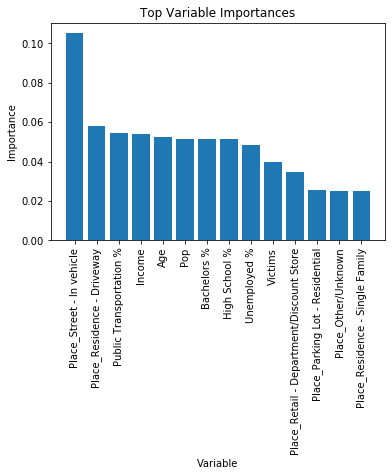

In [182]:
import matplotlib.pyplot as plt

x_values = list(range(len(top_importances)))
plt.bar(x_values, top_importances, orientation= 'vertical')
plt.xticks(x_values, top_features_list, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')

In [146]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig = plt.gcf()
    fig.set_size_inches(20,20)

Confusion matrix, without normalization


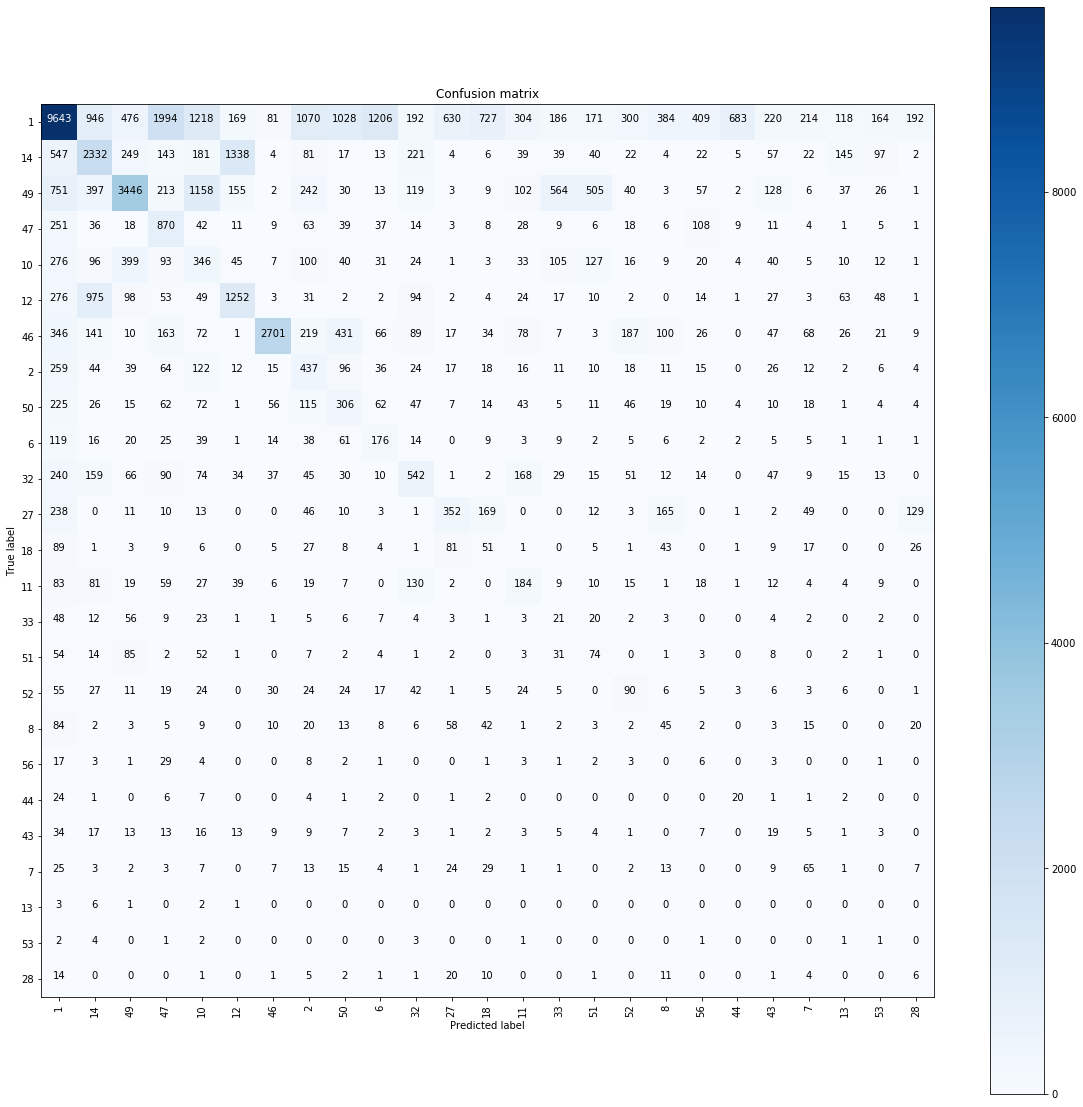

In [147]:
from sklearn.metrics import confusion_matrix

cfn_matrix = confusion_matrix(predictions, test_labels, labels=top_classes)

disp = plot_confusion_matrix(cfn_matrix, classes=top_classes)

In [153]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model1, test, test_labels, n_repeats=2, random_state=4, n_jobs=-1)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.6s finished
/opt/conda/envs/rapids/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


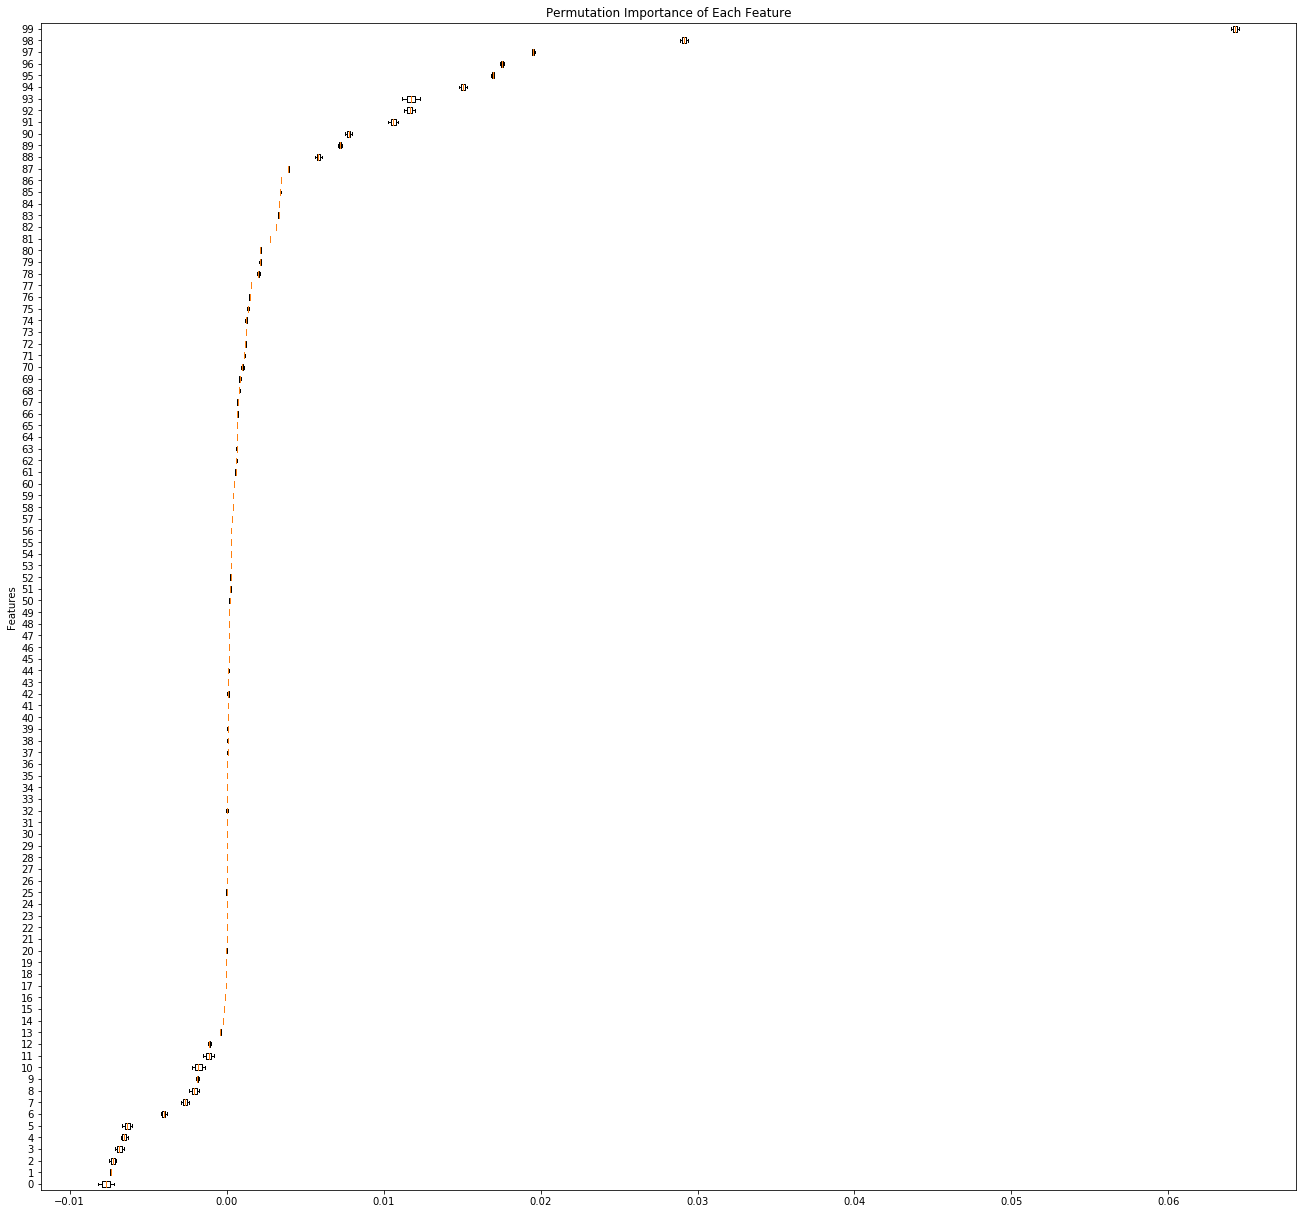

In [154]:
fig, ax = plt.subplots()
sorted_idx = result.importances_mean.argsort()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=range(train.shape[1]))
ax.set_title('Permutation Importance of Each Feature')
ax.set_ylabel('Features')
fig.tight_layout()
fig.set_size_inches(20,20)
plt.show()

In [155]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': np.linspace(10,200).astype(int),
    'max_depth': [None] + list(np.linspace(3,20).astype(int)),
    'max_features': ['auto','sqrt', None] + list(np.arange(0.5,1,0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10,50,500).astype(int)),
    'min_samples_split': [2,5,10],
    'bootstrap': [True,False]
}

estimator = RandomForestClassifier(random_state=4)

rs = RandomizedSearchCV(estimator, param_grid, n_jobs= -1,cv=3,
                       n_iter = 10, verbose = 1, random_state=4)

rs.fit(train, train_labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/conda/envs/rapids/lib/python3.6/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  30 | elapsed:   43.0s remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [156]:
print(rs.best_params_)

{'n_estimators': 110, 'min_samples_split': 10, 'max_leaf_nodes': 37, 'max_features': None, 'max_depth': 19, 'bootstrap': False}


In [157]:
best_model = rs.best_estimator_

In [158]:
best_model.fit(train,train_labels)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=19, max_features=None,
                       max_leaf_nodes=37, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [159]:
predictions2 = best_model.predict(test)
errors2 = abs(predictions2 - test_labels)
mae2 = round((np.mean(errors2)),2)
print("Mean Absolute Error: " + str(mae2) + " percent")

Mean Absolute Error: 15.22 percent


In [160]:
mape2 = abs((test_labels - predictions2)/test_labels)
accuracy2 = 100 - np.mean(mape2)
accuracy2 = round(accuracy2,2)
print("Accuracy: " + str(accuracy2) + " percent")

Accuracy: 97.8 percent


In [161]:
importances2 = list(best_model.feature_importances_)
feature_list2 = list(features.columns)
feature_importances2 = [(feature, importance) for feature, importance in zip(feature_list2,importances2)]
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse=True)
[print("Variable: {:40} Importance: {}".format(*pair)) for pair in feature_importances2]

Variable: Place_Street - In vehicle                Importance: 0.2563340237568711
Variable: Place_Residence - Driveway               Importance: 0.1338340188514563
Variable: Place_Retail - Department/Discount Store Importance: 0.08716015161229872
Variable: Victims                                  Importance: 0.07615157838897622
Variable: Place_Parking Lot - Residential          Importance: 0.06606314163809328
Variable: Place_Street - Residential               Importance: 0.05706037237780874
Variable: Place_Other/Unknown                      Importance: 0.04156684153952386
Variable: Place_Residence - Single Family          Importance: 0.03799615957154099
Variable: Place_Grocery/Supermarket                Importance: 0.030734629548005248
Variable: Place_Retail - Mall                      Importance: 0.029224938592292363
Variable: Place_Retail - Clothing                  Importance: 0.02657502004350352
Variable: Place_Government Building                Importance: 0.024683684963213885
Var

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [183]:
top_importances2 = []
top_features_list2 = []

for x,y in feature_importances2:
    if(y > 0.025):
        top_features_list2.append(x)
        top_importances2.append(y)
top_features_list2

['Place_Street - In vehicle',
 'Place_Residence - Driveway',
 'Place_Retail - Department/Discount Store',
 'Victims',
 'Place_Parking Lot - Residential',
 'Place_Street - Residential',
 'Place_Other/Unknown',
 'Place_Residence - Single Family',
 'Place_Grocery/Supermarket',
 'Place_Retail - Mall',
 'Place_Retail - Clothing']

Text(0.5, 1.0, 'Top Variable Importances')

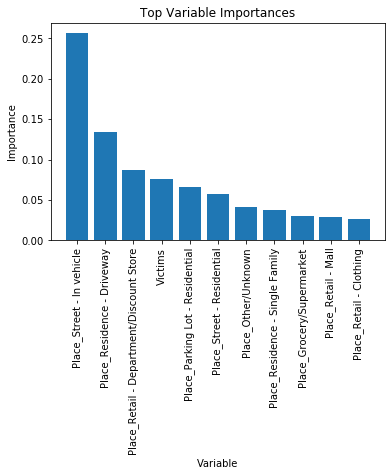

In [184]:
x_values2 = list(range(len(top_importances2)))
plt.bar(x_values2, top_importances2, orientation= 'vertical')
plt.xticks(x_values2, top_features_list2, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Top Variable Importances')

In [88]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

classifier = HistGradientBoostingClassifier(
        random_state=6,
        max_iter=100,
        max_depth=10,
)

classifier.fit(train, train_labels)

HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.1,
                               loss='auto', max_bins=255, max_depth=10,
                               max_iter=100, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=6, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False)

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

pred = classifier.predict(test)
print(mean_absolute_error(test_labels, pred))

21.16305845138688


In [90]:
mape2 = abs((test_labels - pred)/test_labels)
accuracy2 = 100 - np.mean(mape2)
accuracy2 = round(accuracy2,2)
print("Accuracy: " + str(accuracy2) + " percent")

Accuracy: 99.29 percent


Confusion matrix, without normalization


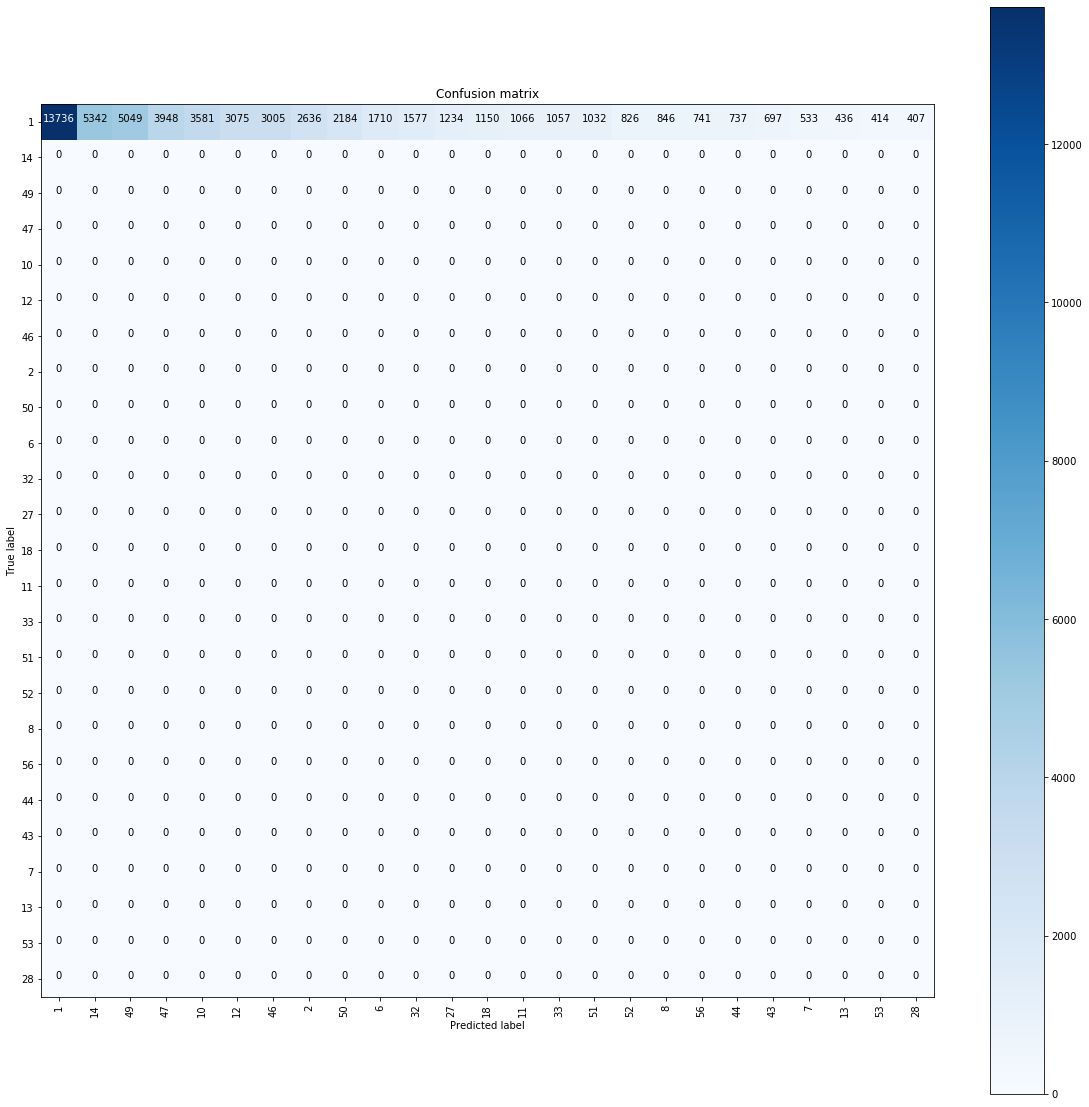

In [192]:
from sklearn.metrics import confusion_matrix

cfn_matrix2 = confusion_matrix(pred, test_labels, labels=top_classes)

disp2 = plot_confusion_matrix(cfn_matrix2, classes=top_classes)

In [198]:
import tensorflow as tf
from tensorflow import keras

In [203]:
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [204]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(100,)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(55, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train, train_labels, epochs=10, batch_size=128)


InvalidArgumentError: device CUDA:0 not supported by XLA service
	while setting up XLA_GPU_JIT device number 0